In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
def fetch_data_df():
    df = pd.read_csv('../../data/final_daily_returns_asset_classes.csv', index_col=0, parse_dates=True)
    df.index = pd.to_datetime(df.index)
    return df

returns_df = fetch_data_df()
returns_df.head()

,REEL,PE,MSCIWORLD,IG,GOV,HY,EONIA
Date,,,,,,,
2005-10-11,0.003231,0.006833,0.004578,-0.001342,-0.001916,-0.004075,0.000054
2005-10-12,-0.003550,-0.009657,-0.007867,-0.002606,-0.001570,-0.004370,0.000058
2005-10-13,-0.018599,-0.010692,0.000588,-0.002331,-0.003062,-0.003423,0.000058
2005-10-14,-0.007856,0.001569,-0.002991,-0.000564,0.000060,0.001618,0.000058
2005-10-17,-0.003613,0.000492,0.003290,0.000458,-0.000227,0.005447,0.000173


In [3]:
weights = np.full(returns_df.shape[1], 1 /returns_df.shape[1])
PnL = (weights * returns_df.values).sum(axis=1)

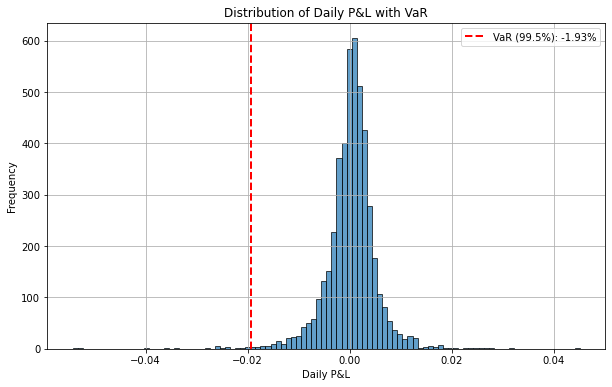

In [5]:
VaR_995 = np.percentile(PnL, 0.5)

# Plot with VaR
plt.figure(figsize=(10, 6))
plt.hist(PnL, bins=100, edgecolor='black', alpha=0.7)
plt.axvline(VaR_995, color='red', linestyle='dashed', linewidth=2, label=f'VaR (99.5%): {VaR_995:.2%}')
plt.title('Distribution of Daily P&L with VaR')
plt.xlabel('Daily P&L')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()